In [5]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle

In [6]:
symbol ="AAPL"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-05-01",end="2021-02-01")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-04-30,18382.0,71.932410,73.066124,71.533010,72.885025
2020-05-01,18383.0,71.012053,74.175035,70.912823,71.711632
2020-05-04,18386.0,71.736440,72.857745,71.029419,72.726265
2020-05-05,18387.0,73.197610,74.671188,73.048762,73.817802
2020-05-06,18388.0,74.537215,75.226869,74.142774,74.579391
...,...,...,...,...,...
2021-01-25,18652.0,142.856542,144.873517,136.336271,142.706757
2021-01-26,18653.0,143.385742,144.084694,141.159058,142.946396
2021-01-27,18654.0,143.215989,144.084701,140.200506,141.848038


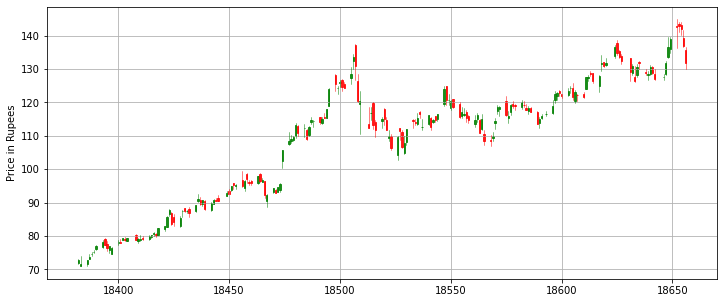

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
candlestick_ohlc(ax,data.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

plt.grid()
plt.ylabel("Price in Rupees")
plt.show()

In [8]:
# create 20 days simple moving average column
data['20_SMA'] = data['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
data['50_SMA'] = data['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
data.head()


,Date,Open,High,Low,Close,20_SMA,50_SMA
Date,,,,,,,
2020-04-30,18382.0,71.932410,73.066124,71.533010,72.885025,72.885025,72.885025
2020-05-01,18383.0,71.012053,74.175035,70.912823,71.711632,72.298328,72.298328
2020-05-04,18386.0,71.736440,72.857745,71.029419,72.726265,72.440974,72.440974
2020-05-05,18387.0,73.197610,74.671188,73.048762,73.817802,72.785181,72.785181
2020-05-06,18388.0,74.537215,75.226869,74.142774,74.579391,73.144023,73.144023


In [9]:
data['Signal'] = 0.0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1.0, 0.0)
data

,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal
Date,,,,,,,,
2020-04-30,18382.0,71.932410,73.066124,71.533010,72.885025,72.885025,72.885025,0.0
2020-05-01,18383.0,71.012053,74.175035,70.912823,71.711632,72.298328,72.298328,0.0
2020-05-04,18386.0,71.736440,72.857745,71.029419,72.726265,72.440974,72.440974,0.0
2020-05-05,18387.0,73.197610,74.671188,73.048762,73.817802,72.785181,72.785181,0.0
2020-05-06,18388.0,74.537215,75.226869,74.142774,74.579391,73.144023,73.144023,0.0
...,...,...,...,...,...,...,...,...
2021-01-25,18652.0,142.856542,144.873517,136.336271,142.706757,131.971294,125.935213,1.0
2021-01-26,18653.0,143.385742,144.084694,141.159058,142.946396,132.529959,126.407907,1.0
2021-01-27,18654.0,143.215989,144.084701,140.200506,141.848038,132.798059,126.864225,1.0


In [10]:
data['Position'] = data['Signal'].diff()
# display first few rows
data.head()

,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,
2020-04-30,18382.0,71.932410,73.066124,71.533010,72.885025,72.885025,72.885025,0.0,NaN
2020-05-01,18383.0,71.012053,74.175035,70.912823,71.711632,72.298328,72.298328,0.0,0.0
2020-05-04,18386.0,71.736440,72.857745,71.029419,72.726265,72.440974,72.440974,0.0,0.0
2020-05-05,18387.0,73.197610,74.671188,73.048762,73.817802,72.785181,72.785181,0.0,0.0
2020-05-06,18388.0,74.537215,75.226869,74.142774,74.579391,73.144023,73.144023,0.0,0.0


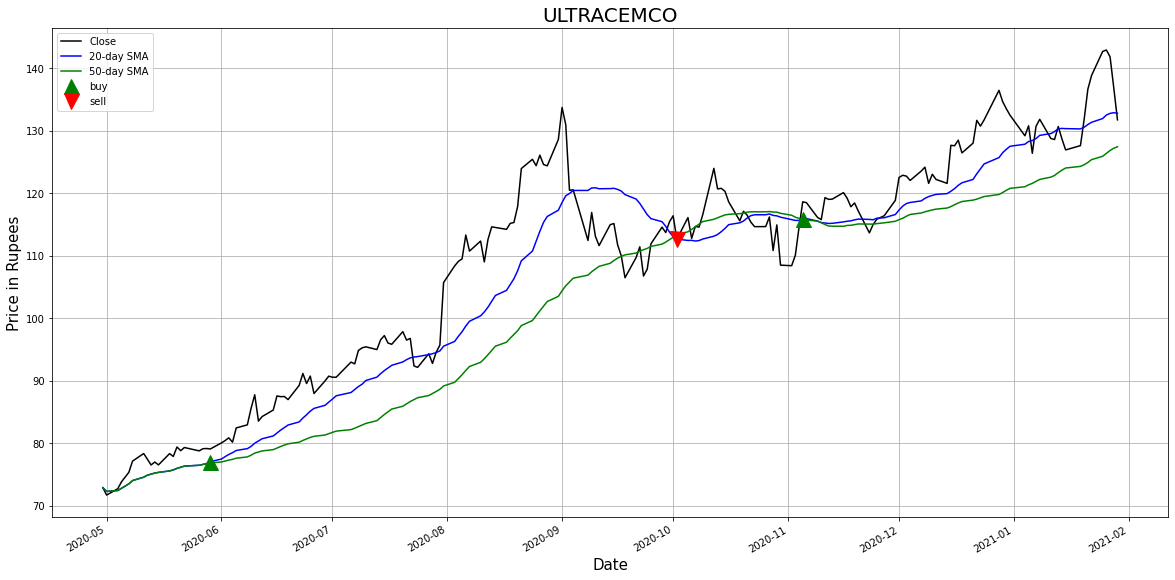

In [11]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close') 
data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
data['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data[data['Position'] == 1].index, 
         data['20_SMA'][data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data[data['Position'] == -1].index, 
         data['20_SMA'][data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()